# Prophet algorithm for time-series forecasting

In [17]:
#install prophet if not done already
! pip install prophet

  Obtaining dependency information for prophet from https://files.pythonhosted.org/packages/24/2b/834e9a347f2f0161e32a3c6125b8a1ebdf6ac33199a0ed3a0bdf1f0c296f/prophet-1.1.5-py3-none-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy>=1.0.4 from https://files.pythonhosted.org/packages/5b/a0/a0f4a556dff2189bc08d0f69f0d4aac1b7e4e0cedc9a70b30a134f73d100/cmdstanpy-1.2.1-py3-none-any.whl.metadata
  Obtaining dependency information for matplotlib>=2.0.0 from https://files.pythonhosted.org/packages/a1/27/8a807464b0cf47fdf3ba8cbb542d4f3a551da0254d7588667857f8a8a88a/matplotlib-3.8.3-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for holidays>=0.25 from https://files.pythonhosted.org/packages/91/7a/2c5c043e4a7cff3dbab6b0f3a79b492e76c7dc1a06f309897509c9d467f5/holidays-0.44-py3-none-any.whl.metadata
  Obtaining dependency information for importlib-resources from https://files.pythonhosted.org/packages/f3/3e/a01c6de9853a7d73672926e01966f979723386f0ba83d62e

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Load the data
data = pd.read_excel("D:\\kulea_projects\\r_project\\global_sugar\\Wholesale Sugar Prices.xlsx",)

data.head()

,date,kampala,mombasa,nairobi,dar_es_salaam,kigali,durban,cape_town,johannesburg,mogadishu w,djibouti b,berbera w,juba w,juba b,djibouti w,mogadishu b
0,2019-08-22,NaN,786.0,805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2019-08-26,NaN,786.0,805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2019-08-29,NaN,786.0,805.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2019-09-02,NaN,776.0,786.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2019-09-05,NaN,766.0,790.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = data[['date', 'nairobi']]
df.head()

,date,nairobi
0,2019-08-22,805.0
1,2019-08-26,805.0
2,2019-08-29,805.0
3,2019-09-02,786.0
4,2019-09-05,790.0


In [4]:
df['ds']=df['date']
df['y'] = df['nairobi']
df.head()

C:\Users\user\AppData\Local\Temp\ipykernel_10032\1928819775.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ds']=df['date']
C:\Users\user\AppData\Local\Temp\ipykernel_10032\1928819775.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y'] = df['nairobi']


,date,nairobi,ds,y
0,2019-08-22,805.0,2019-08-22,805.0
1,2019-08-26,805.0,2019-08-26,805.0
2,2019-08-29,805.0,2019-08-29,805.0
3,2019-09-02,786.0,2019-09-02,786.0
4,2019-09-05,790.0,2019-09-05,790.0


In [5]:
print('size of dataset:', len(df))

size of dataset: 478


In [6]:
# print('size of dataset:', len(df))

# Size of test dataset

In [7]:
Test_size = int(100) #last 100 values

In [8]:
train_df = df.head(len(df)-Test_size)
test_df = df.tail(Test_size) 

# Plot the series to see the dataset

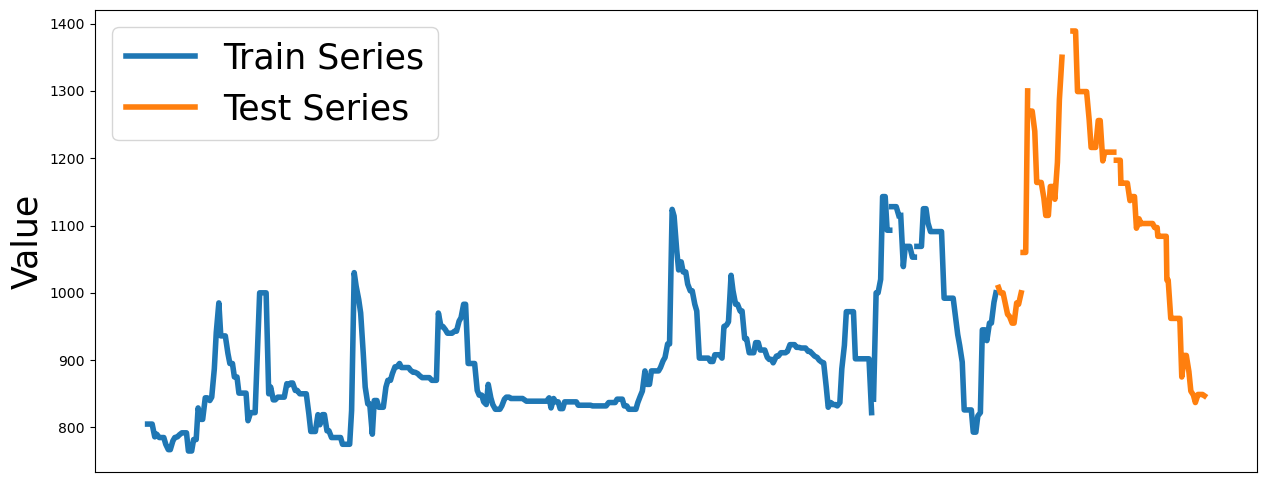

In [9]:
from matplotlib import pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot(train_df['ds'], train_df['y'], linewidth = 4, label = "Train Series")
plt.plot(test_df['ds'], test_df['y'], linewidth = 4, label = "Test Series")


plt.legend(fontsize=25)
plt.ylabel('Value', fontsize = 25)
plt.xticks([])
plt.show()

# A simple fitting of Prophet Model: Without hyperparameter Tuning

In [10]:
# Disable the prophet logging 
import logging
logger = logging.getLogger('cmdstanpy')
logger.addHandler(logging.NullHandler())
logger.propagate = False
logger.setLevel(logging.CRITICAL)

In [11]:
#define loss function 

def mape(y_true, y_pred):
    return round(np.mean(np.abs((y_true - y_pred) / y_true)) * 100, 2)


In [12]:
import prophet
print(prophet.__version__)


1.1.3


In [17]:
! pip install --upgrade prophet


In [18]:
import prophet
print(prophet.__version__)


1.1.3


In [15]:
help(prophet)

Help on package prophet:

NAME
    prophet

DESCRIPTION
    # Copyright (c) 2017-present, Facebook, Inc.
    # All rights reserved.
    #
    # This source code is licensed under the BSD-style license found in the
    # LICENSE file in the root directory of this source tree. An additional grant
    # of patent rights can be found in the PATENTS file in the same directory.

PACKAGE CONTENTS
    __version__
    diagnostics
    forecaster
    hdays
    make_holidays
    models
    plot
    serialize
    tests (package)
    utilities

DATA
    about = {'__builtins__': {'ArithmeticError': <class 'ArithmeticError'>...
    f = <_io.TextIOWrapper name='C:\\Users\\user\\anacon...phet\\__version...
    here = WindowsPath('C:/Users/user/anaconda3/envs/wasokoenv/Lib/site-pa...

VERSION
    1.1.3

FILE
    c:\users\user\anaconda3\envs\wasokoenv\lib\site-packages\prophet\__init__.py




In [20]:
! pip install fbprophet

     -------------------------------------- 64.0/64.0 kB 488.7 kB/s eta 0:00:00
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Obtaining dependency information for Cython>=0.22 from https://files.pythonhosted.org/packages/20/50/638cbeb5b202b39d0605f6170fe25ed75287152827b0282d64135995b32b/Cython-3.0.9-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for cmdstanpy==0.9.5 from https://files.pythonhosted.org/packages/e3/e2/204c9c6beaf9e05ad28bd589c154afff35dffa6166d76841d3c0dec6c1e3/cmdstanpy-0.9.5-py3-none-any.whl.metadata
  Obtaining dependency information for pystan>=2.14 from https://files.pythonhosted.org/packages/36/dc/e84dcee309f00384674bd4571085a1daada182552a0fbc83231672539b4b/pystan-3.9.0-py3-none-any.whl.metadata
  Using cached pystan-3.9.0-py3-none-any.whl.metadata (3.7 kB)
  Obtaining dependency information for LunarCalendar>=0.0.9 from https://files.pythonhosted.org/packages/ab/e0/a52ffc0239547485855

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [6 lines of output]
      Traceback (most recent call last):
        File "<string>", line 2, in <module>
        File "<pip-setuptools-caller>", line 34, in <module>
        File "C:\Users\user\AppData\Local\Temp\pip-install-sq04klu0\pystan_a2fc6eef14274564a59a15a4954d9383\setup.py", line 122, in <module>
          from Cython.Build.Inline import _get_build_extension
      ModuleNotFoundError: No module named 'Cython'
      [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [26]:
! pip install python-mango

  Obtaining dependency information for python-mango from https://files.pythonhosted.org/packages/df/dc/395ce460bbd6790eee662cc5090586f2c080b1cfbbd6ee4c74c5088acbd3/python_mango-0.1.7-py2.py3-none-any.whl.metadata
  Obtaining dependency information for pymongo from https://files.pythonhosted.org/packages/9d/10/f01efcd8f34cce0adb59c9feebdd092bd7305d35e77400e9999557112ade/pymongo-4.6.2-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for dnspython<3.0.0,>=1.16.0 from https://files.pythonhosted.org/packages/87/a1/8c5287991ddb8d3e4662f71356d9656d91ab3a36618c3dd11b280df0d255/dnspython-2.6.1-py3-none-any.whl.metadata
   ---------------------------------------- 472.8/472.8 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 307.7/307.7 kB 9.6 MB/s eta 0:00:00


In [30]:
from python.mango import scheduler, Tuner

ModuleNotFoundError: No module named 'python'

In [22]:
from prophet import Prophet
model = Prophet()
model.fit(train_df)
future = model.make_future_dataframe(periods=Test_size, freq='D')
forecast = model.predict(future)
predictions = forecast.tail(Test_size)

AttributeError: 'Prophet' object has no attribute 'stan_backend'

In [12]:
#predictions

## Get default predictions error

In [13]:
error = mape(test_df['y'], predictions['yhat'])   
print('error is:', error)

error is: 11.74


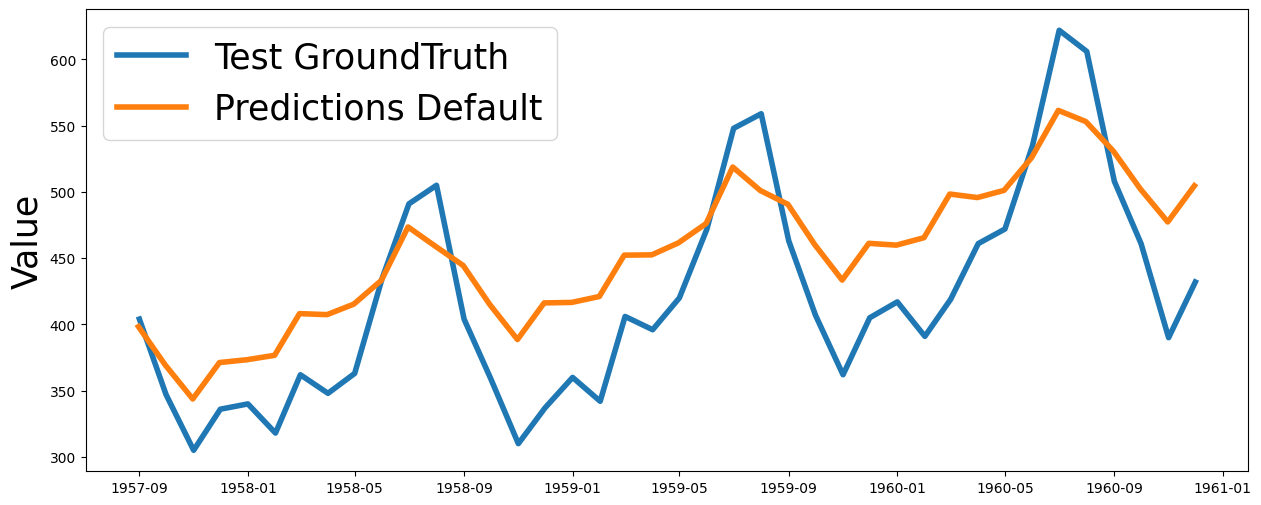

In [14]:
from matplotlib import pyplot as plt

f = plt.figure()
f.set_figwidth(15)
f.set_figheight(6)

plt.plot(pd.to_datetime(test_df['ds']), test_df['y'], linewidth = 4, label = "Test GroundTruth")
plt.plot(pd.to_datetime(predictions['ds']), predictions['yhat'], linewidth = 4, label = "Predictions Default")

plt.legend(fontsize=25)
plt.ylabel('Value', fontsize = 25)
#plt.xticks([])
plt.show()

# Tune the hyperparameters

In [15]:
from prophet import Prophet
from mango import scheduler, Tuner


def objective_function(args_list):
    global train_df, test_df
    
    params_evaluated = []
    results = []
    
    for params in args_list:
        try:
            model = Prophet(**params)
            model.fit(train_df)
            future = model.make_future_dataframe(periods=Test_size, freq='M')
            forecast = model.predict(future)
            predictions_tuned = forecast.tail(Test_size)
            error = mape(test_df['y'], predictions_tuned['yhat'])   
            
            params_evaluated.append(params)
            results.append(error)
        except:
            #print(f"Exception raised for {params}")
            #pass 
            params_evaluated.append(params)
            results.append(25.0)# Giving high loss for exceptions regions of spaces
        
        #print(params_evaluated, mse)
    return params_evaluated, results

In [16]:
from scipy.stats import uniform


param_space = dict(growth = ['linear', 'logistic', 'flat'],
                   n_changepoints  = range(0, 55, 5),
                   changepoint_range  = uniform(0.5, 0.5),
                   yearly_seasonality = [True, False],
                   weekly_seasonality = [True, False],
                   daily_seasonality = [True, False],
                   seasonality_mode = ['additive', 'multiplicative'],
                   seasonality_prior_scale=uniform(5.0, 15.0),
                   changepoint_prior_scale=uniform(0.0, 0.1),
                   interval_width = uniform(0.2, 0.8),
                   uncertainty_samples = [500, 1000, 1500, 2000]
                   )

In [17]:
## see all hyperparameters allowed by prophet
#help(Prophet)

In [18]:
conf_Dict = dict()
conf_Dict['initial_random'] = 10
conf_Dict['num_iteration'] = 50

In [19]:
tuner = Tuner(param_space, objective_function, conf_Dict)

In [20]:
results = tuner.minimize()
print('best parameters:', results['best_params'])
print('best loss:', results['best_objective'])

  0%|          | 0/50 [00:00<?, ?it/s]

Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.
Optimization terminated abnormally. Falling back to Newton.


best parameters: {'changepoint_prior_scale': 0.03645018575124749, 'changepoint_range': 0.5473968905424325, 'daily_seasonality': True, 'growth': 'linear', 'interval_width': 0.9544262800336518, 'n_changepoints': 45, 'seasonality_mode': 'multiplicative', 'seasonality_prior_scale': 16.83218918593137, 'uncertainty_samples': 1500, 'weekly_seasonality': True, 'yearly_seasonality': True}
best loss: 3.95


In [21]:
# ## See the variation of internal Mango's objective function

# from matplotlib import pyplot as plt
# fig = plt.figure(figsize=(30,5))
# plt.title('Variation of Objective',fontsize=20)
# plt.plot(results['objective_values'],lw=4,label='Mango objective')
# plt.xlabel('Iterations', fontsize=25)
# plt.ylabel('objective_values',fontsize=25)
# plt.xticks(fontsize=20)
# plt.yticks(fontsize=20)
# plt.legend(fontsize = 20)
# plt.show()

# Train the best model and plot predictions

In [22]:
model = Prophet(**results['best_params'])
model.fit(train_df)
future = model.make_future_dataframe(periods=Test_size, freq='M')
forecast = model.predict(future)
predictions_tuned = forecast.tail(Test_size)

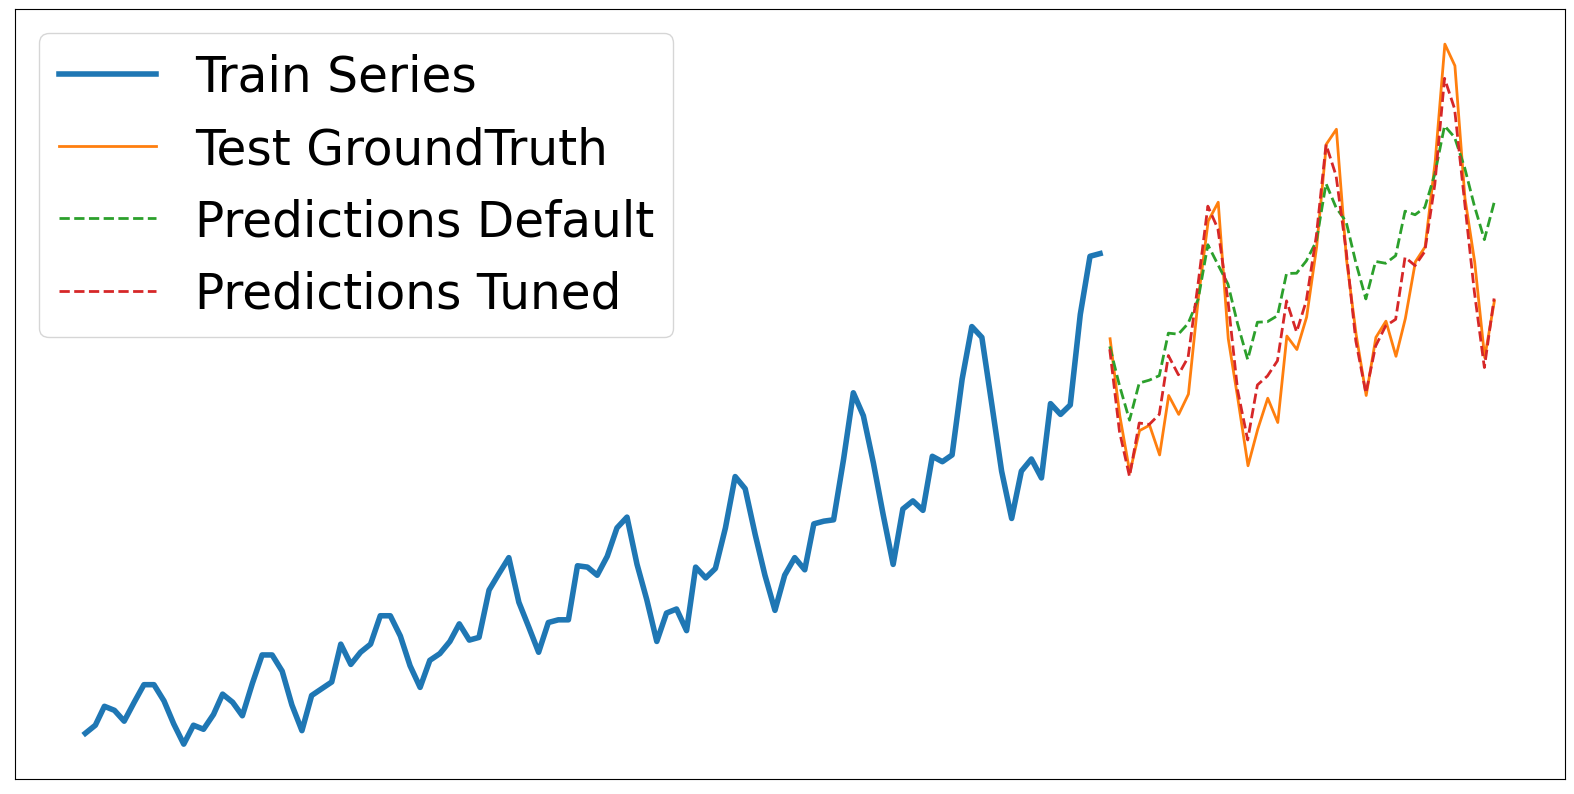

In [34]:
from matplotlib import pyplot as plt

f = plt.figure()
f.set_figwidth(20)
f.set_figheight(10)

plt.plot(pd.to_datetime(train_df['ds']), train_df['y'], linewidth = 4, label = "Train Series")
plt.plot(pd.to_datetime(test_df['ds']), test_df['y'], linewidth = 2, label = "Test GroundTruth")
plt.plot(predictions['ds'], predictions['yhat'], linewidth = 2, label = "Predictions Default", linestyle='dashed')
plt.plot(predictions_tuned['ds'], predictions_tuned['yhat'], linewidth = 2, label = "Predictions Tuned", linestyle='dashed')

plt.legend(fontsize=35)
#plt.ylabel('Value', fontsize = 25)
plt.xticks([])
plt.yticks([])
plt.show()